In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import skopt.plots
import skopt

/home/isaac/.cache/pypoetry/virtualenvs/econdl-sxkRgAzp-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/home/isaac/.cache/pypoetry/virtualenvs/econdl-sxkRgAzp-py3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
data = pd.read_csv('data/monthlyData_updated.csv')

In [3]:
data

,Unnamed: 0,y,L_0y,L_1y,L_2y,L_3y,L_4y,L_5y,L_6y,L_7y,...,L11_MARX_INVEST,L1_MARX_VIXCLSx,L2_MARX_VIXCLSx,L3_MARX_VIXCLSx,L11_MARX_VIXCLSx,L1_MARX_YLag,L2_MARX_YLag,L3_MARX_YLag,L11_MARX_YLag,trend
0,2/1/1960,0.001361,-0.001361,0.002042,0.000000,0.003413,0.002396,0.001029,0.001373,0.002408,...,-0.000194,17.376753,17.971982,18.843562,17.198753,0.000341,0.000227,0.001024,0.001028,1
1,3/1/1960,0.000000,0.001361,-0.001361,0.002042,0.000000,0.003413,0.002396,0.001029,0.001373,...,-0.001698,18.378749,16.907250,17.471048,17.089637,0.000000,0.000681,0.000511,0.001170,2
2,4/1/1960,0.004411,0.000000,0.001361,-0.001361,0.002042,0.000000,0.003413,0.002396,0.001029,...,-0.000174,23.034353,22.285987,20.205553,18.739526,0.000681,0.000000,0.000511,0.001256,3
3,5/1/1960,0.001015,0.004411,0.000000,0.001361,-0.001361,0.002042,0.000000,0.003413,0.002396,...,-0.000240,19.011622,17.997163,18.695185,18.330510,0.002205,0.001924,0.001103,0.001595,4
4,6/1/1960,0.001352,0.001015,0.004411,0.000000,0.001361,-0.001361,0.002042,0.000000,0.003413,...,0.001355,18.212148,22.174919,20.623251,19.554250,0.002713,0.001809,0.001697,0.001507,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3/1/2022,0.012331,0.007945,0.006430,0.005735,0.006968,0.008627,0.004100,0.003330,0.004526,...,-0.000939,24.528600,23.451900,22.378575,19.700792,0.007188,0.006704,0.006770,0.006346,746
746,4/1/2022,0.003314,0.012331,0.007945,0.006430,0.005735,0.006968,0.008627,0.004100,0.003330,...,-0.001785,26.539850,25.331333,24.323125,20.156525,0.010138,0.008902,0.008110,0.006843,747
747,5/1/2022,0.009691,0.003314,0.012331,0.007945,0.006430,0.005735,0.006968,0.008627,0.004100,...,-0.001784,25.710900,25.854900,25.119750,20.766242,0.007823,0.007863,0.007505,0.006586,748
748,6/1/2022,0.013136,0.009691,0.003314,0.012331,0.007945,0.006430,0.005735,0.006968,0.008627,...,-0.002109,26.828900,26.864867,26.684375,21.602842,0.006502,0.008445,0.008320,0.006811,749


In [19]:
results = np.load('results/21sep_bayesian_monthly/experiment_records.npz', allow_pickle=True)['experiment_records']

In [20]:
train_mean_errors = []
test_mean_errors = []

for i in range(100):
    train_mean_errors.append(np.mean(results[i]['train_mean_error']))
    test_mean_errors.append(np.mean(results[i]['test_mean_error']))

    if np.mean(results[i]['test_mean_error']) < 1:
        print(results[i])

{'experiment_id': 0, 'train_mean_error': array([0.58404107, 0.7232896 , 0.73094239, 0.53791574, 0.53765342,
       0.72128265, 0.74342739]), 'test_mean_error': array([0.61308365, 0.94691323, 1.09225134, 1.23979045, 0.85899935,
       0.34179721, 0.70321408]), 'params': {'dropout_rate': 0.25, 'nodes': [200, 200, 200], 'tvpl_archi': [10], 'constant_tvpl': [50], 'precision_lambda': 0.25, 'lr': 0.001, 'activation': 'SELU', 'time_hemi_prior_variance': 1}}
{'experiment_id': 2, 'train_mean_error': array([0.74185927, 0.86279586, 0.88843197, 0.72233051, 0.82498559,
       0.82875527, 0.89895226]), 'test_mean_error': array([0.60672563, 0.97057438, 0.82452555, 1.72361998, 1.11957791,
       0.28678749, 0.86865421]), 'params': {'dropout_rate': 0.25, 'nodes': [8, 8, 8], 'tvpl_archi': [7], 'constant_tvpl': [14], 'precision_lambda': 0.25, 'lr': 0.0008967376801947966, 'activation': 'SELU', 'time_hemi_prior_variance': 1}}
{'experiment_id': 3, 'train_mean_error': array([0.56254332, 0.69801811, 0.7173221

Text(0, 0.5, 'Test Mean Error')

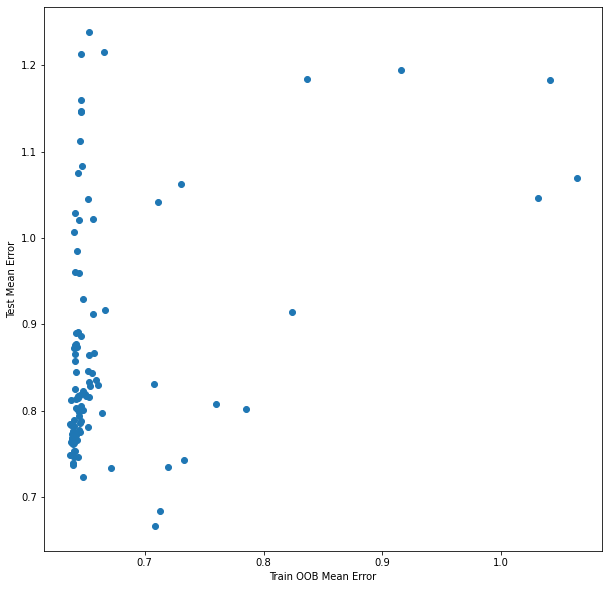

In [21]:
# Change size of dots
plt.figure(figsize=(10, 10))
plt.scatter(train_mean_errors, test_mean_errors)
# Set xlabel
plt.xlabel('Train OOB Mean Error')
# Set ylabel
plt.ylabel('Test Mean Error')
# Set the x and y limits
# plt.xlim(0.5, 1.5)
# plt.ylim(0.5, 1.5)

In [22]:
skopt_results = skopt.load('results/21sep_bayesian_monthly/opt_results.pkl')

In [23]:
skopt_results.x

[800, 6, 42, 4, 0.006540685533802189]

<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

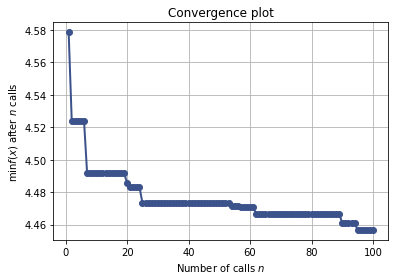

In [24]:
# Plots the best to-date result at each iteration
skopt.plots.plot_convergence(skopt_results)

array([[<AxesSubplot:xlabel='nn_width', ylabel='Number of samples'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='nn_depth'>,
        <AxesSubplot:xlabel='nn_depth', ylabel='Number of samples'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='tvpl'>, <AxesSubplot:>,
        <AxesSubplot:xlabel='tvpl', ylabel='Number of samples'>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='tvpl_constant_vs_coef_ratio'>,
        <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:xlabel='tvpl_constant_vs_coef_ratio', ylabel='Number of samples'>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='nn_width', ylabel='lr'>,
        <AxesSubplot:xlabel='nn_depth'>, <AxesSubplot:xlabel='tvpl'>,
        <AxesSubplot:xlabel='tvpl_constant_vs_coef_ratio'>,
        <AxesSubplot:xlabel='lr', ylabel='Number of samples'>]],
      dtype=object)

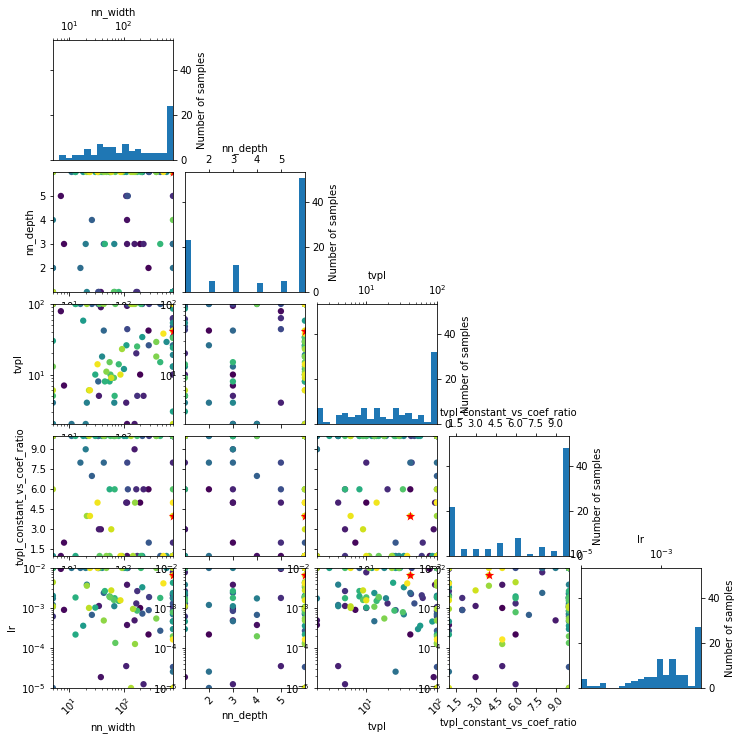

In [25]:
skopt.plots.plot_evaluations(skopt_results)

array([[<AxesSubplot:xlabel='nn_width', ylabel='Partial dependence'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='nn_depth'>,
        <AxesSubplot:xlabel='nn_depth', ylabel='Partial dependence'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='tvpl'>, <AxesSubplot:>,
        <AxesSubplot:xlabel='tvpl', ylabel='Partial dependence'>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='tvpl_constant_vs_coef_ratio'>,
        <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:xlabel='tvpl_constant_vs_coef_ratio', ylabel='Partial dependence'>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='nn_width', ylabel='lr'>,
        <AxesSubplot:xlabel='nn_depth'>, <AxesSubplot:xlabel='tvpl'>,
        <AxesSubplot:xlabel='tvpl_constant_vs_coef_ratio'>,
        <AxesSubplot:xlabel='lr', ylabel='Partial dependence'>]],
      dtype=object)

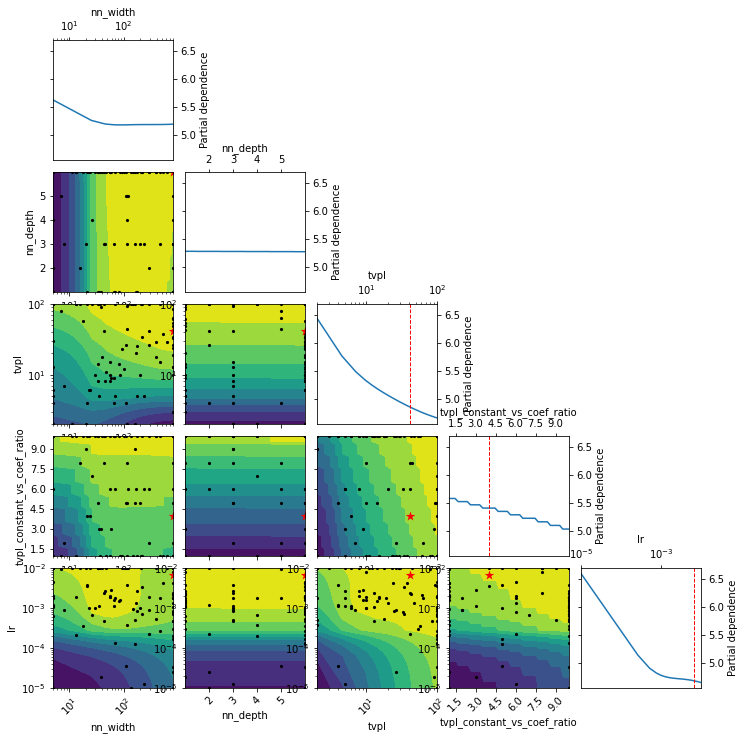

In [26]:
skopt.plots.plot_objective(skopt_results)